In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyogrio

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge pyogrio


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()

In [13]:
world.dtypes

pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object

In [14]:
world.geometry.name

'geometry'

In [16]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name

'borders'

## Plotting!

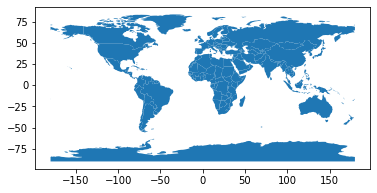

In [17]:
world.plot()
plt.show()

<AxesSubplot:>

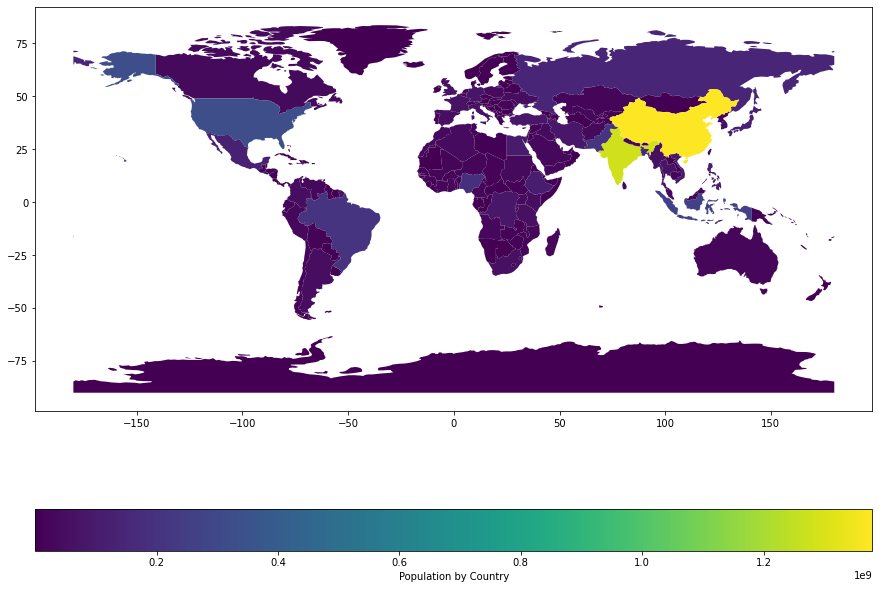

In [19]:
fig, ax = plt.subplots(figsize=(15, 12))

world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': 'Population by Country', 'orientation': 'horizontal'})

<AxesSubplot:>

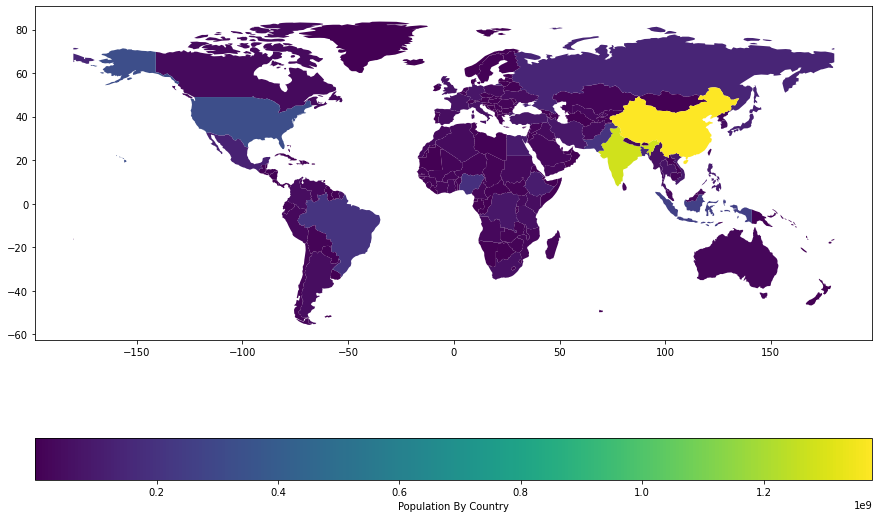

In [21]:
# filter the data frame
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

#create the figures and axes
fig, ax = plt.subplots(figsize=(15, 12))

# create the map
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': 'Population By Country', 'orientation': 'horizontal'})

In [23]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


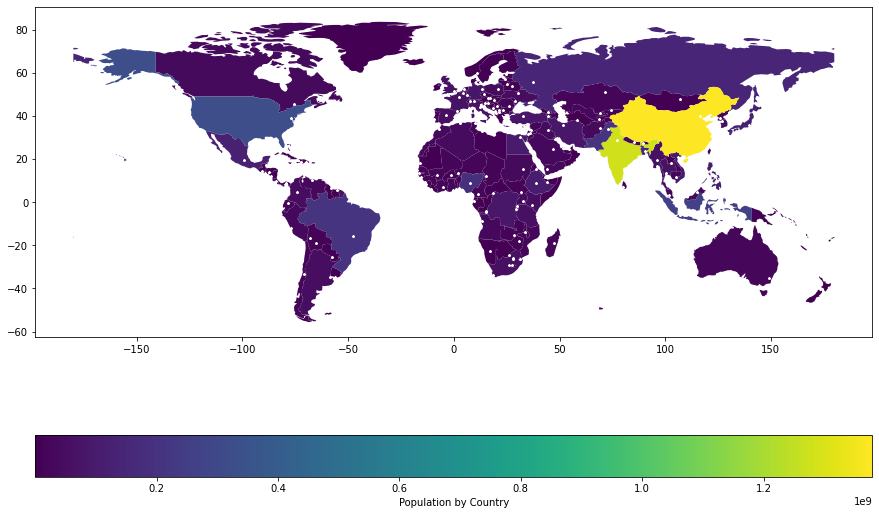

In [25]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(15, 12))

# a layer of countries
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

# a layer of cities
cities.plot(ax=ax, marker='*', color='white', markersize=5)
plt.show()